In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# plt.rcParams.update({'font.size': 18})
import seaborn as sns
import regex as re
import os
import numpy as np
from ast import literal_eval

In [2]:
plt.rcParams.update({'font.size': 24})

In [3]:
! cd ../results && pwd && find ~+ -type f -name "parameters.txt"

/mnt/extra/continuous-training/results
/mnt/extra/continuous-training/results/1716388630504083316/parameters.txt
/mnt/extra/continuous-training/results/1715800932305356174/parameters.txt
/mnt/extra/continuous-training/results/1715797440000861620/parameters.txt
/mnt/extra/continuous-training/results/1716427246319181846/parameters.txt
/mnt/extra/continuous-training/results/1716441905776072185/parameters.txt
/mnt/extra/continuous-training/results/1716367842823362017/parameters.txt
/mnt/extra/continuous-training/results/1715829270852093274/parameters.txt
/mnt/extra/continuous-training/results/1715824045022882806/parameters.txt
/mnt/extra/continuous-training/results/1716534283790913710/parameters.txt
/mnt/extra/continuous-training/results/1716379033163021455/parameters.txt
/mnt/extra/continuous-training/results/1716212459629080525/parameters.txt
/mnt/extra/continuous-training/results/1716243487037497021/parameters.txt
/mnt/extra/continuous-training/results/1715788174518859352/parameters.txt

In [3]:
result_paths = [
    "/mnt/extra/continuous-training/results/1716388630504083316/parameters.txt",
    "/mnt/extra/continuous-training/results/1715800932305356174/parameters.txt",
    # "/mnt/extra/continuous-training/results/1715797440000861620/parameters.txt",
    "/mnt/extra/continuous-training/results/1716427246319181846/parameters.txt",
    "/mnt/extra/continuous-training/results/1716441905776072185/parameters.txt",
    "/mnt/extra/continuous-training/results/1716367842823362017/parameters.txt",
    "/mnt/extra/continuous-training/results/1715829270852093274/parameters.txt",
    "/mnt/extra/continuous-training/results/1715824045022882806/parameters.txt",
    # "/mnt/extra/continuous-training/results/1716534283790913710/parameters.txt",
    "/mnt/extra/continuous-training/results/1716379033163021455/parameters.txt",
    "/mnt/extra/continuous-training/results/1716212459629080525/parameters.txt",
    "/mnt/extra/continuous-training/results/1716243487037497021/parameters.txt",
    "/mnt/extra/continuous-training/results/1715788174518859352/parameters.txt",
    "/mnt/extra/continuous-training/results/1715798673120208944/parameters.txt",
    "/mnt/extra/continuous-training/results/1716460302382630009/parameters.txt",
    "/mnt/extra/continuous-training/results/1715827831526188263/parameters.txt",
    "/mnt/extra/continuous-training/results/1716198158046891789/parameters.txt",
    "/mnt/extra/continuous-training/results/1716484348220584355/parameters.txt",
    "/mnt/extra/continuous-training/results/1716295246796068485/parameters.txt",
    "/mnt/extra/continuous-training/results/1716294228837958380/parameters.txt",
    "/mnt/extra/continuous-training/results/1716732915032421437/parameters.txt",
    "/mnt/extra/continuous-training/results/1715784179206269278/parameters.txt",
    "/mnt/extra/continuous-training/results/1715826410660371920/parameters.txt",
    "/mnt/extra/continuous-training/results/1716346809929177293/parameters.txt",
    "/mnt/extra/continuous-training/results/1715797482983971494/parameters.txt",
    "/mnt/extra/continuous-training/results/1715831605658106103/parameters.txt",
    # "/mnt/extra/continuous-training/results/1716284496311271620/parameters.txt",
    "/mnt/extra/continuous-training/results/1715787184529834842/parameters.txt",
    "/mnt/extra/continuous-training/results/1715784577195353505/parameters.txt",
    "/mnt/extra/continuous-training/results/1715824912969658937/parameters.txt",
    "/mnt/extra/continuous-training/results/1716222643830117930/parameters.txt",
    "/mnt/extra/continuous-training/results/1716232409591245915/parameters.txt",
    "/mnt/extra/continuous-training/results/1716306973329212172/parameters.txt",
    "/mnt/extra/continuous-training/results/1716569638705634921/parameters.txt",
    "/mnt/extra/continuous-training/results/1716763301509528146/parameters.txt",
]

In [4]:
stats_df = pd.DataFrame(columns=['folder_path', 'algo', 'param_path', 'csv_path', 'num_retrain', 'training_time_total', 'training_time_single', 'training_cpu_time', 'training_counter', 'inference_time_total', 'inference_time_single', 'inference_cpu_time', 'inference_counter'])
for stat in result_paths:
    contents = []
    with open(stat, "r") as f:
        contents = f.readlines()
    # Iterate to get variables
    folder_path = ''
    algo_name = ''
    csv_path = ''
    param_path = stat
    valid_entry = False
    retrained = -1
    training_time_total = -1
    training_time_single = -1
    training_cpu_time = -1
    training_counter = -1
    inference_time_total = -1
    inference_time_single = -1
    inference_cpu_time = -1
    inference_counter = -1
    for content in contents:
        if not valid_entry and 'Inference' in content:
            valid_entry = True
        if 'Output' in content:
            try:
                folder_path = content.split('Output = ')[1].split('\n')[0]
            except:
                folder_path = content.split('Output =')[1].split('\n')[0]
        if '-output' in content:
            try:
                algo_name = content.split(' = ')[1].split('\n')[0]
            except:
                algo_name = content.split('=')[1].split('\n')[0]
            csv_path = os.path.join(algo_name+'.csv')
        if 'Retrained' in content:
            retrained = float(content.split(' = ')[1].split('\n')[0])
        if 'Training time total' in content:
            training_time_total = float(content.split(' = ')[1].split(' s')[0])
        if 'Training time single' in content:
            training_time_single = float(content.split(' = ')[1].split(' s')[0])
        if 'Training CPU times usage' in content:
            training_cpu_time = float(content.split(' = ')[1].split(' sCPU')[0])
        if 'Training counter' in content:
            training_counter = float(content.split(' = ')[1].split('\n')[0])
        if 'Inference time total' in content:
            inference_time_total = float(content.split(' = ')[1].split(' s')[0])
        if 'Inference time single' in content:
            inference_time_single = float(content.split(' = ')[1].split(' s')[0])
        if 'Inference CPU times usage' in content:
            inference_cpu_time = float(content.split(' = ')[1].split(' sCPU')[0])
        if 'Inference counter' in content:
            inference_counter = float(content.split(' = ')[1].split('\n')[0])
    if valid_entry:
        stats_df.loc[len(stats_df)] = [folder_path, algo_name, param_path, csv_path, retrained, training_time_total, training_time_single, training_cpu_time, training_counter, inference_time_total, inference_time_single, inference_cpu_time, inference_counter]
stats_df

,folder_path,algo,param_path,csv_path,num_retrain,training_time_total,training_time_single,training_cpu_time,training_counter,inference_time_total,inference_time_single,inference_cpu_time,inference_counter
0,/mnt/extra/continuous-training/results/1716388...,nn_clf_ks,/mnt/extra/continuous-training/results/1716388...,nn_clf_ks.csv,479.0,21980.649150,45.793019,51703.47,480.0,10032.250347,2.540995e-05,13639.67,394815847.0
1,/mnt/extra/continuous-training/results/1716427...,nn_period_8,/mnt/extra/continuous-training/results/1716427...,nn_period_8.csv,60.0,2889.722465,47.372499,6878.79,61.0,10184.816628,2.579637e-05,13500.27,394815847.0
2,/mnt/extra/continuous-training/results/1716441...,nn_period_4,/mnt/extra/continuous-training/results/1716441...,nn_period_4.csv,120.0,5734.934710,47.396155,13857.33,121.0,10331.345422,2.616750e-05,14153.37,394815847.0
3,/mnt/extra/continuous-training/results/1716367...,nn_clf_psi,/mnt/extra/continuous-training/results/1716367...,nn_clf_psi.csv,0.0,116.802383,116.802383,273.06,1.0,10143.362862,2.569138e-05,13277.23,394815847.0
4,/mnt/extra/continuous-training/results/1716379...,nn_clf_noretrain,/mnt/extra/continuous-training/results/1716379...,nn_clf_noretrain.csv,0.0,132.626504,132.626504,308.03,1.0,8628.072599,2.185341e-05,12061.30,394815847.0
5,/mnt/extra/continuous-training/results/1716212...,nn_clf_outlier,/mnt/extra/continuous-training/results/1716212...,nn_clf_outlier.csv,0.0,130.000752,130.000752,319.28,1.0,9089.687840,2.302260e-05,13129.92,394815847.0
6,/mnt/extra/continuous-training/results/1716243...,nn_clf_ph,/mnt/extra/continuous-training/results/1716243...,nn_clf_ph.csv,479.0,22076.109312,45.991894,53973.83,480.0,11240.523951,2.847030e-05,15293.58,394815847.0
7,/mnt/extra/continuous-training/results/1716460...,nn_period_2,/mnt/extra/continuous-training/results/1716460...,nn_period_2.csv,239.0,11168.904291,46.537101,27860.93,240.0,9452.793773,2.394229e-05,13791.21,394815847.0
8,/mnt/extra/continuous-training/results/1716198...,nn_clf_ip_based,/mnt/extra/continuous-training/results/1716198...,nn_clf_ip_based.csv,9.0,595.274385,59.527438,1346.02,10.0,11122.100411,2.817035e-05,14819.12,394815847.0
9,/mnt/extra/continuous-training/results/1716484...,nn_period_1,/mnt/extra/continuous-training/results/1716484...,nn_period_1.csv,479.0,21924.009195,45.675019,57641.16,480.0,9823.677795,2.488167e-05,14566.30,394815847.0


In [191]:
print('\n'.join(stats_df[stats_df['algo'].isin(['nn_clf_ks','nn_clf_js','nn_clf_kl','nn_clf_ph','nn_clf_psi'])]['folder_path'].tolist()))

/mnt/extra/continuous-training/results/1716388630504083316
/mnt/extra/continuous-training/results/1716367842823362017
/mnt/extra/continuous-training/results/1716243487037497021
/mnt/extra/continuous-training/results/1716295246796068485
/mnt/extra/continuous-training/results/1716346809929177293
/mnt/extra/continuous-training/results/1716306973329212172


In [192]:
print('\n'.join(stats_df[stats_df['algo'].isin(['nn_clf_outlier','nn_clf_labeler','nn_clf_quartile','nn_clf_ip_based'])]['folder_path'].tolist()))

/mnt/extra/continuous-training/results/1716212459629080525
/mnt/extra/continuous-training/results/1716198158046891789
/mnt/extra/continuous-training/results/1716222643830117930
/mnt/extra/continuous-training/results/1716232409591245915


In [5]:
values_df = pd.DataFrame({
    'path': pd.Series(dtype='string'),
    'algo': pd.Series(dtype='string'),
    'length': pd.Series(dtype='int'),
    'f1': pd.Series(dtype='object'),
    'roc_auc': pd.Series(dtype='object'),
    'retrain': pd.Series(dtype='int'),
    'training_time_total': pd.Series(dtype='float'),
    'training_time_single': pd.Series(dtype='float'),
    'training_cpu_time': pd.Series(dtype='float'),
    'training_counter': pd.Series(dtype='int'),
    'inference_time_total': pd.Series(dtype='float'),
    'inference_time_single': pd.Series(dtype='float'),
    'inference_cpu_time': pd.Series(dtype='float'),
    'inference_counter': pd.Series(dtype='int'),
})

for i, row in stats_df.iterrows():
    temp_df = pd.read_csv(os.path.join(row['folder_path'], row['csv_path']), index_col=0)
    temp_df = temp_df.drop_duplicates(subset='minute', keep="last")
    retrain_list = temp_df['retrain'].tolist()
    retrain = [i for i in retrain_list if i==True]
    if temp_df['minute'].max() == 480:
        if i != 3:
            values_df.loc[len(values_df)] = [row['folder_path'], row['algo'], temp_df['minute'].max(), temp_df['f1_score'].tolist()[:-5], temp_df['roc_auc'].tolist()[:-5], row['num_retrain'], row['training_time_total'], row['training_time_single'], row['training_cpu_time'], row['training_counter'], row['inference_time_total'], row['inference_time_single'], row['inference_cpu_time'], row['inference_counter']]
        else:
            values_df.loc[len(values_df)] = [row['folder_path'], row['algo'], temp_df['minute'].max(), temp_df['f1_score'].tolist(), temp_df['roc_auc'].tolist(), row['num_retrain'], row['training_time_total'], row['training_time_single'], row['training_cpu_time'], row['training_counter'], row['inference_time_total'], row['inference_time_single'], row['inference_cpu_time'], row['inference_counter']]

# values_df.drop([2, 6, 8], inplace=True)
values_df.to_csv('values_all.csv')
values_df

,path,algo,length,f1,roc_auc,retrain,training_time_total,training_time_single,training_cpu_time,training_counter,inference_time_total,inference_time_single,inference_cpu_time,inference_counter
0,/mnt/extra/continuous-training/results/1716388...,nn_clf_ks,480,"[0.9214611710327476, 0.919838888618434, 0.9048...","[0.8198498888028423, 0.8256601797271587, 0.849...",479.0,21980.649150,45.793019,51703.47,480.0,10032.250347,2.540995e-05,13639.67,394815847.0
1,/mnt/extra/continuous-training/results/1716427...,nn_period_8,480,"[0.9202471017528276, 0.9175025731603492, 0.907...","[0.8134299335664734, 0.8109008831448392, 0.817...",60.0,2889.722465,47.372499,6878.79,61.0,10184.816628,2.579637e-05,13500.27,394815847.0
2,/mnt/extra/continuous-training/results/1716441...,nn_period_4,480,"[0.9209700758525065, 0.9183215734915602, 0.908...","[0.8125884933601596, 0.8102673592798255, 0.817...",120.0,5734.934710,47.396155,13857.33,121.0,10331.345422,2.616750e-05,14153.37,394815847.0
3,/mnt/extra/continuous-training/results/1716367...,nn_clf_psi,480,"[0.9197654622644006, 0.9172083649553148, 0.907...","[0.810808516523525, 0.8087955474825699, 0.8151...",0.0,116.802383,116.802383,273.06,1.0,10143.362862,2.569138e-05,13277.23,394815847.0
4,/mnt/extra/continuous-training/results/1716379...,nn_clf_noretrain,480,"[0.9201613827625776, 0.9176643724824766, 0.907...","[0.8111232931972419, 0.8093186911374659, 0.815...",0.0,132.626504,132.626504,308.03,1.0,8628.072599,2.185341e-05,12061.30,394815847.0
5,/mnt/extra/continuous-training/results/1716212...,nn_clf_outlier,480,"[0.9205160678335544, 0.9178789920684164, 0.908...","[0.8136540751780935, 0.8111766805273294, 0.817...",0.0,130.000752,130.000752,319.28,1.0,9089.687840,2.302260e-05,13129.92,394815847.0
6,/mnt/extra/continuous-training/results/1716243...,nn_clf_ph,480,"[0.9201277632974332, 0.9190521660981638, 0.902...","[0.8124159658424613, 0.8198419941018107, 0.848...",479.0,22076.109312,45.991894,53973.83,480.0,11240.523951,2.847030e-05,15293.58,394815847.0
7,/mnt/extra/continuous-training/results/1716460...,nn_period_2,480,"[0.9207771776908976, 0.9180044629557522, 0.908...","[0.814364051086718, 0.8116612453498218, 0.8183...",239.0,11168.904291,46.537101,27860.93,240.0,9452.793773,2.394229e-05,13791.21,394815847.0
8,/mnt/extra/continuous-training/results/1716198...,nn_clf_ip_based,480,"[0.9199549694759536, 0.9174194431905214, 0.907...","[0.8103088217334729, 0.8081884380025653, 0.814...",9.0,595.274385,59.527438,1346.02,10.0,11122.100411,2.817035e-05,14819.12,394815847.0
9,/mnt/extra/continuous-training/results/1716484...,nn_period_1,480,"[0.9207450601580952, 0.9192487228493398, 0.904...","[0.8170635314445682, 0.8243580018287757, 0.847...",479.0,21924.009195,45.675019,57641.16,480.0,9823.677795,2.488167e-05,14566.30,394815847.0


In [52]:
# values_df = pd.read_csv('values_all.csv', index_col=0)
# values_df['f1'] = values_df['f1'].apply(literal_eval)
# values_df['roc_auc'] = values_df['roc_auc'].apply(literal_eval)
# values_df

In [6]:
algorithms_name = {
    "nn_clf_ks": "KS-Test",
    "nn_period_8": "8min",
    "nn_period_4": "4min",
    "nn_clf_psi": "PSI",
    "nn_clf_noretrain": "NoRetrain",
    "nn_clf_outlier": "Outlier",
    "nn_clf_ph": "PageHinkley",
    "nn_period_2": "2min",
    "nn_clf_ip_based": "IP-based",
    "nn_period_1": "1min",
    "model_zoo_sample": "Reuse",
    "nn_clf_js": "JS-Div",
    "nn_clf_quartile": "Quartile",
    "nn_clf_labeler": "Labeler",
    "nn_clf_kl": "KL-Div",
    "nurd": "Reweight",
    "dt_clf_noretrain": "NoRetrain-DT"
}

algorithms_color = {
    "nn_clf_ks": "darkgreen",
    "nn_period_8": "red",
    "nn_period_4": "indianred",
    "nn_clf_psi": "forestgreen",
    "nn_clf_noretrain": "grey",
    "nn_clf_outlier": "orange",
    "nn_clf_ph": "limegreen",
    "nn_period_2": "brown",
    "nn_clf_ip_based": "gold",
    "nn_period_1": "darkred",
    "model_zoo_sample": "blueviolet",
    "nn_clf_js": "lime",
    "nn_clf_quartile": "goldenrod",
    "nn_clf_labeler": "darkorange",
    "nn_clf_kl": "lawngreen",
    "nurd": "hotpink",
    "dt_clf_noretrain": "black"
}

# #Retrain against Rough Accuracy Distribution

In [8]:
df_plot = pd.DataFrame(columns=['algo', 'id', 'retrain', 'low', 'open', 'close', 'high', 'inference_cpu_time'])

for i, row in values_df.iterrows():
    df_plot.loc[len(df_plot)] = [row['algo'], algorithms_name[row['algo']], row['retrain'], np.percentile(row['roc_auc'], 1)*100, np.percentile(row['roc_auc'], 25)*100, np.percentile(row['roc_auc'], 75)*100, np.percentile(row['roc_auc'], 99)*100, row['inference_cpu_time']]

df_plot.sort_values(by=['retrain', 'open', 'close'], ascending=[True, True, True], inplace=True)
df_plot.reset_index(inplace=True, drop=True)
df_plot

,algo,id,retrain,low,open,close,high,inference_cpu_time
0,nurd,Reweight,-1.0,50.513533,51.933237,53.832858,56.117555,3053.82
1,nn_clf_psi,PSI,0.0,64.230829,69.230857,81.053183,84.779710,13277.23
2,nn_clf_noretrain,NoRetrain,0.0,65.139861,70.093876,81.008369,84.879624,12061.30
3,nn_clf_outlier,Outlier,0.0,65.643033,70.706308,81.388843,85.243335,13129.92
4,nn_clf_quartile,Quartile,0.0,67.245058,72.665935,81.825775,85.355725,11879.30
5,dt_clf_noretrain,NoRetrain-DT,0.0,68.609144,72.821522,76.125554,79.506630,270.70
6,model_zoo_sample,Reuse,0.0,66.263442,72.983104,75.868246,78.222598,307.48
7,nn_clf_labeler,Labeler,1.0,64.385199,69.480979,81.057739,84.654052,12989.16
8,nn_clf_ip_based,IP-based,9.0,62.956255,68.899540,80.777847,85.684474,14819.12
9,nn_period_8,8min,60.0,59.739940,76.697824,81.346177,85.294957,13500.27


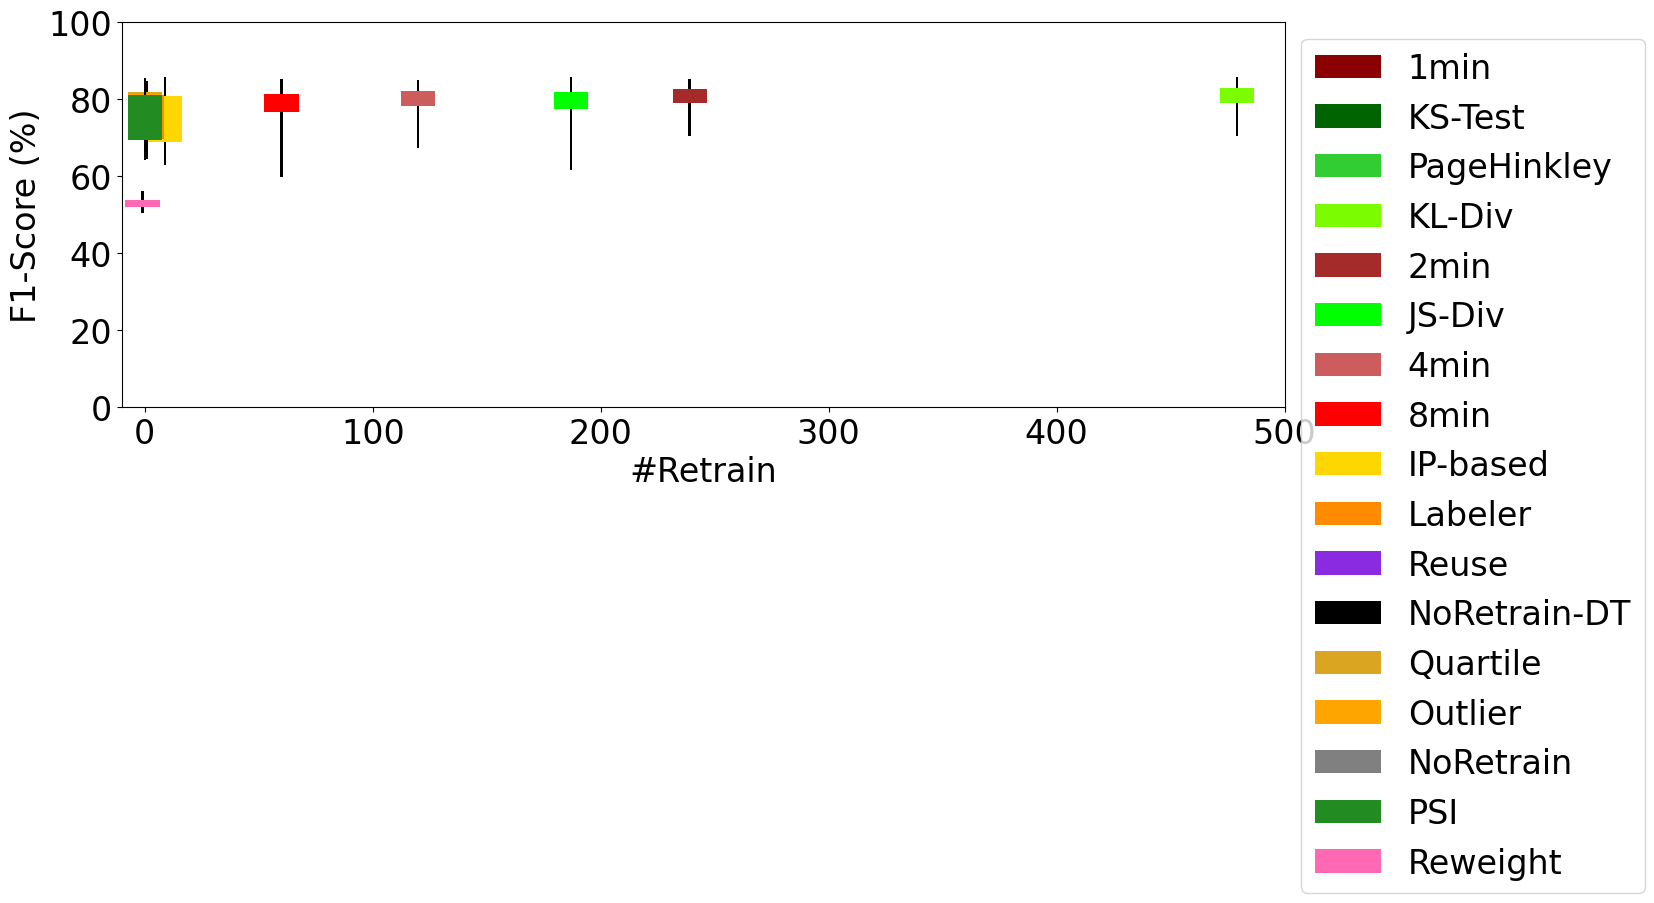

In [9]:
plt.figure(figsize=(15, 5))

plt.xlim(-10, 500)
plt.xlabel('#Retrain')

plt.ylim(0, 100)
plt.ylabel('F1-Score (%)')

bar_width = 15
stick_width = 1

for index, row in df_plot[::-1].iterrows():
    # Bottom to top: LOCH (L-H), (O-C)
    plt.bar(row.retrain, row.close-row.open, bar_width, row.open, color=algorithms_color[row['algo']], label=row['id']) # main bar
    plt.bar(row.retrain, row.low-row.open, stick_width, row.open, color='black') # left stick
    plt.bar(row.retrain, row.high-row.close, stick_width, row.close, color='black') # right stick

plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

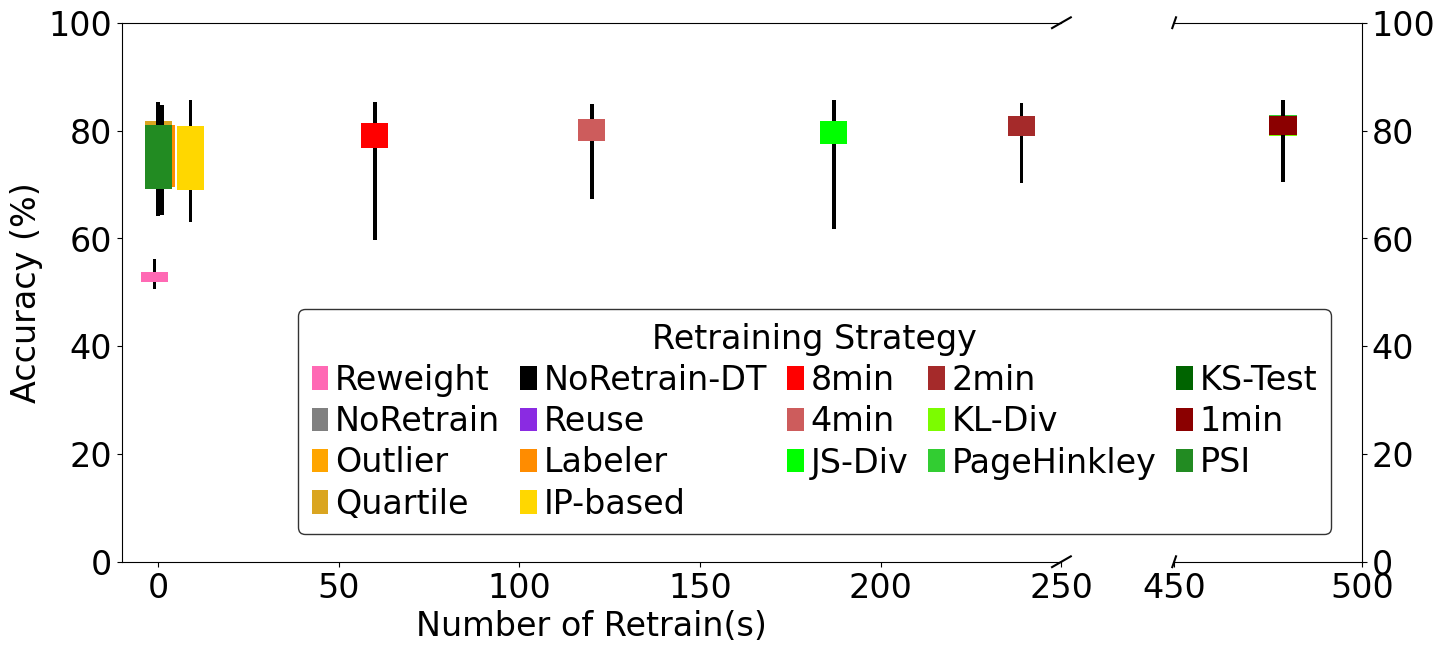

In [12]:
f, (ax, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16, 7), gridspec_kw={'width_ratios': [5, 1]})

# plt.xlim(-100, df_plot['retrain'].max()+100)
ax.set_xlabel('Number of Retrain(s)')

# plt.ylim(0, 100)
ax.set_ylabel('Accuracy (%)')

bar_width = 7.5
stick_width = 1

for index, row in df_plot.iterrows():
    if index != 1:
        # Bottom to top: LOCH (L-H), (O-C)
        ax.bar(row.retrain, row.close-row.open, bar_width, row.open, color=algorithms_color[row['algo']], label=row['id']) # main bar
        ax.bar(row.retrain, row.low-row.open, stick_width, row.open, color='black') # left stick
        ax.bar(row.retrain, row.high-row.close, stick_width, row.close, color='black') # right stick
        
        ax2.bar(row.retrain, row.close-row.open, bar_width, row.open, color=algorithms_color[row['algo']], label=row['id']) # main bar
        ax2.bar(row.retrain, row.low-row.open, stick_width, row.open, color='black') # left stick
        ax2.bar(row.retrain, row.high-row.close, stick_width, row.close, color='black') # right stick

row = df_plot.loc[1]

# Bottom to top: LOCH (L-H), (O-C)
ax.bar(row.retrain, row.close-row.open, bar_width, row.open, color=algorithms_color[row['algo']], label=row['id']) # main bar
ax.bar(row.retrain, row.low-row.open, stick_width, row.open, color='black') # left stick
ax.bar(row.retrain, row.high-row.close, stick_width, row.close, color='black') # right stick

ax2.bar(row.retrain, row.close-row.open, bar_width, row.open, color=algorithms_color[row['algo']], label=row['id']) # main bar
ax2.bar(row.retrain, row.low-row.open, stick_width, row.open, color='black') # left stick
ax2.bar(row.retrain, row.high-row.close, stick_width, row.close, color='black') # right stick
        
ax.set_xlim(-10, 250)
ax2.set_xlim(450, 500)
ax.set_ylim(0, 100)
ax2.set_ylim(0, 100)

ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
# ax.tick_params(labelright='off')
ax2.yaxis.tick_right()
ax2.tick_params(labelright='off')

d = 0.01  # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d, 1+d), (-d, +d), **kwargs)
ax.plot((1-d, 1+d), (1-d, 1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1-d, 1+d), **kwargs)
ax2.plot((-d, +d), (-d, +d), **kwargs)

plt.legend(bbox_to_anchor=(-4.75, 0.5), loc="upper left",
           title="Retraining Strategy", alignment='center', 
           frameon=True, facecolor=(1, 1, 1, 0), 
           edgecolor='black', labelspacing=0.25, columnspacing=0.6, 
           handletextpad=0.2, handlelength=0.5, ncol=5)

plt.show()

Insight #1: #Retrain is not perpendicular towards accuracy stability

# Distribution Violin Plot (which one is more plump?)

In [13]:
df_plot2 = values_df.copy(deep=True)
df_plot2.sort_values(by=['retrain'], ascending=[True], inplace=True)
df_plot2.reset_index(inplace=True, drop=True)
df_plot2.loc[df_plot2['algo'] == 'nurd', 'retrain'] = 0
df_plot2

,path,algo,length,f1,roc_auc,retrain,training_time_total,training_time_single,training_cpu_time,training_counter,inference_time_total,inference_time_single,inference_cpu_time,inference_counter
0,/mnt/extra/continuous-training/results/1716569...,nurd,480,"[0.0681294816331881, 0.0721397712738599, 0.066...","[0.513556243375378, 0.5144237185776803, 0.5134...",0.0,1937.969917,1937.969917,5423.99,1.0,774.296270,1.961158e-06,3053.82,394815847.0
1,/mnt/extra/continuous-training/results/1716763...,dt_clf_noretrain,480,"[0.9994849988248726, 0.8964866155547134, 0.885...","[0.9994138156517904, 0.7936728154015084, 0.796...",0.0,8.399248,8.399248,21.86,1.0,108.013683,2.735799e-07,270.70,394815847.0
2,/mnt/extra/continuous-training/results/1716222...,nn_clf_quartile,480,"[0.9211165294618596, 0.9183876687862962, 0.909...","[0.8207377975465127, 0.8182867782059808, 0.825...",0.0,158.253036,158.253036,375.76,1.0,8624.983328,2.184559e-05,11879.30,394815847.0
3,/mnt/extra/continuous-training/results/1716367...,nn_clf_psi,480,"[0.9197654622644006, 0.9172083649553148, 0.907...","[0.810808516523525, 0.8087955474825699, 0.8151...",0.0,116.802383,116.802383,273.06,1.0,10143.362862,2.569138e-05,13277.23,394815847.0
4,/mnt/extra/continuous-training/results/1716379...,nn_clf_noretrain,480,"[0.9201613827625776, 0.9176643724824766, 0.907...","[0.8111232931972419, 0.8093186911374659, 0.815...",0.0,132.626504,132.626504,308.03,1.0,8628.072599,2.185341e-05,12061.30,394815847.0
5,/mnt/extra/continuous-training/results/1716212...,nn_clf_outlier,480,"[0.9205160678335544, 0.9178789920684164, 0.908...","[0.8136540751780935, 0.8111766805273294, 0.817...",0.0,130.000752,130.000752,319.28,1.0,9089.687840,2.302260e-05,13129.92,394815847.0
6,/mnt/extra/continuous-training/results/1716732...,model_zoo_sample,480,"[0.999868643940244, 0.8910540237226606, 0.8289...","[0.9998574806651472, 0.7780262255118618, 0.744...",0.0,249.080781,8.302693,601.93,30.0,123.752973,3.380031e-07,307.48,366129722.0
7,/mnt/extra/continuous-training/results/1716232...,nn_clf_labeler,480,"[0.918800704576591, 0.9161779472513504, 0.9063...","[0.811310483131318, 0.8085204141819868, 0.8150...",1.0,193.408426,96.704213,455.41,2.0,10044.129121,2.544004e-05,12989.16,394815847.0
8,/mnt/extra/continuous-training/results/1716198...,nn_clf_ip_based,480,"[0.9199549694759536, 0.9174194431905214, 0.907...","[0.8103088217334729, 0.8081884380025653, 0.814...",9.0,595.274385,59.527438,1346.02,10.0,11122.100411,2.817035e-05,14819.12,394815847.0
9,/mnt/extra/continuous-training/results/1716427...,nn_period_8,480,"[0.9202471017528276, 0.9175025731603492, 0.907...","[0.8134299335664734, 0.8109008831448392, 0.817...",60.0,2889.722465,47.372499,6878.79,61.0,10184.816628,2.579637e-05,13500.27,394815847.0


In [14]:
flatten_f1 = pd.DataFrame(columns=['Algorithm', 'ROC-AUC'])
for i, row in df_plot2.iterrows():
    for f1 in row['roc_auc']:
        flatten_f1.loc[len(flatten_f1)] = [row['algo'], f1]
flatten_f1.head()

,Algorithm,ROC-AUC
0,nurd,0.513556
1,nurd,0.514424
2,nurd,0.513485
3,nurd,0.514654
4,nurd,0.515570


In [17]:
print([algorithms_color[x] for x in flatten_f1['Algorithm'].unique().tolist()])
print([algorithms_name[x]+'('+str(int(y))+')' for x, y in zip(df_plot2['algo'].tolist(), df_plot2['retrain'].tolist())])

['hotpink', 'black', 'goldenrod', 'forestgreen', 'grey', 'orange', 'blueviolet', 'darkorange', 'gold', 'red', 'indianred', 'lime', 'brown', 'darkred', 'limegreen', 'lawngreen', 'darkgreen']
['Reweight(0)', 'NoRetrain-DT(0)', 'Quartile(0)', 'PSI(0)', 'NoRetrain(0)', 'Outlier(0)', 'Reuse(0)', 'Labeler(1)', 'IP-based(9)', '8min(60)', '4min(120)', 'JS-Div(187)', '2min(239)', '1min(479)', 'PageHinkley(479)', 'KL-Div(479)', 'KS-Test(479)']


In [15]:
plt.rcParams.update({'font.size': 18})

/tmp/ipykernel_1583088/3246995587.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  vp = sns.violinplot(data=flatten_f1, x='Algorithm', y='ROC-AUC', palette=['hotpink', 'black', 'goldenrod', 'forestgreen', 'grey', 'orange', 'blueviolet', 'darkorange', 'gold', 'red', 'indianred', 'lime', 'brown', 'darkred', 'limegreen', 'lawngreen', 'darkgreen'], ax=ax, linewidth=0.75)
/tmp/ipykernel_1583088/3246995587.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  vp.set_xticklabels(['Reweight(0)', 'NoRetrain-DT(0)', 'Quartile(0)', 'PSI(0)', 'NoRetrain(0)', 'Outlier(0)', 'Reuse(0)', 'Labeler(1)', 'IP-based(9)', '8min(60)', '4min(120)', 'JS-Div(187)', '2min(239)', '1min(479)', 'PageHinkley(479)', 'KL-Div(479)', 'KS-Test(479)'])


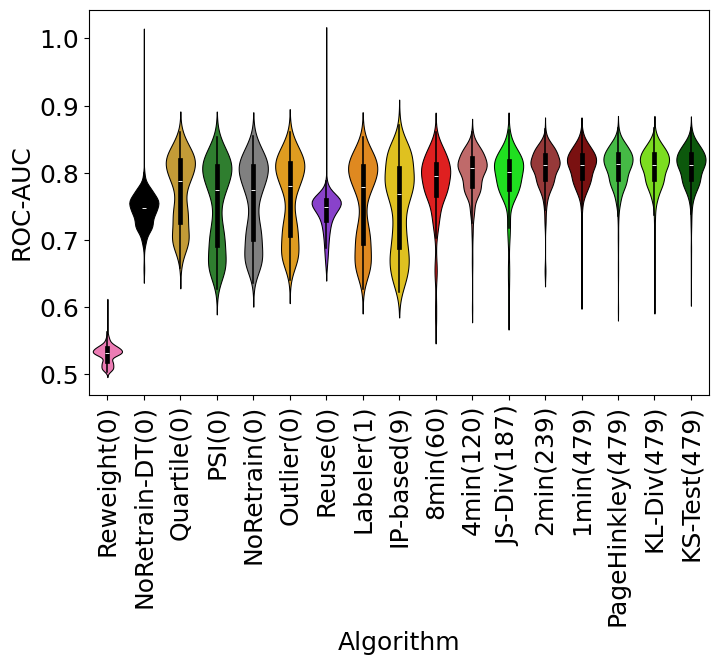

In [18]:
fig, ax = plt.subplots(figsize=(8, 5))

vp = sns.violinplot(data=flatten_f1, x='Algorithm', y='ROC-AUC', palette=['hotpink', 'black', 'goldenrod', 'forestgreen', 'grey', 'orange', 'blueviolet', 'darkorange', 'gold', 'red', 'indianred', 'lime', 'brown', 'darkred', 'limegreen', 'lawngreen', 'darkgreen'], ax=ax, linewidth=0.75)
vp.set_xticklabels(['Reweight(0)', 'NoRetrain-DT(0)', 'Quartile(0)', 'PSI(0)', 'NoRetrain(0)', 'Outlier(0)', 'Reuse(0)', 'Labeler(1)', 'IP-based(9)', '8min(60)', '4min(120)', 'JS-Div(187)', '2min(239)', '1min(479)', 'PageHinkley(479)', 'KL-Div(479)', 'KS-Test(479)'])
plt.xticks(rotation=90)
plt.show()

# Average F1 against inference overhead

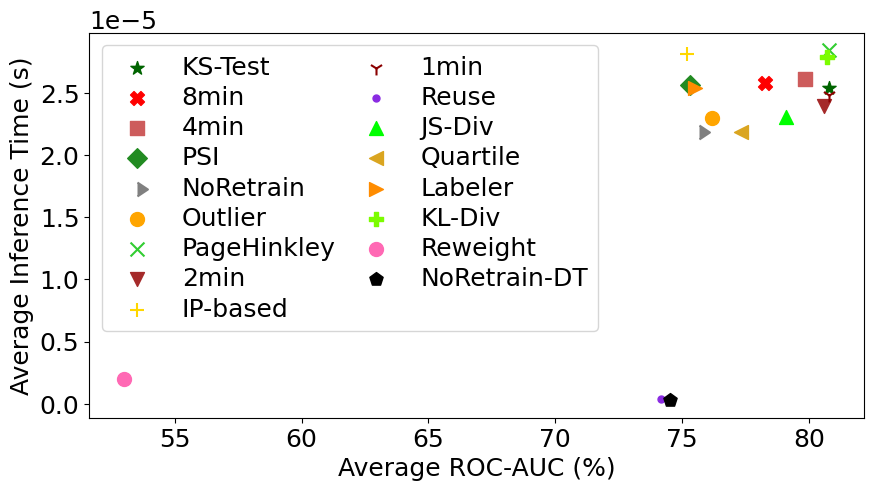

In [20]:
df_plot3 = pd.DataFrame(columns=['algo', 'id', 'retrain', 'average', 'inference_cpu_time', 'inference_time_single', 'color'])

for i, row in values_df.iterrows():
    df_plot3.loc[len(df_plot3)] = [row['algo'], algorithms_name[row['algo']], row['retrain'], (sum(row['roc_auc'])/len(row['roc_auc']))*100, row['inference_cpu_time'], row['inference_time_single'], algorithms_color[row['algo']]]

df_plot3['size'] = [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
df_plot3['marker'] = ['*', 'X', ',', 'D', 9, 'o', 'x', 'v', '+', '1', '.', '^', '<', '>', 'P', 'o', 'p']

df_plot3.reset_index(inplace=True, drop=True)

fig, ax = plt.subplots(figsize = (10, 5))

for i, row in df_plot3.iterrows():
    plt.scatter(x=row['average'], y=row['inference_time_single'], s=row['size'], c=row['color'], label=row['id'], marker=row['marker'])
ax.set(xlabel ="Average ROC-AUC (%)", ylabel = "Average Inference Time (s)")

plt.legend(loc='best', ncol=2, labelspacing=0.25, columnspacing=0.6)

plt.show()

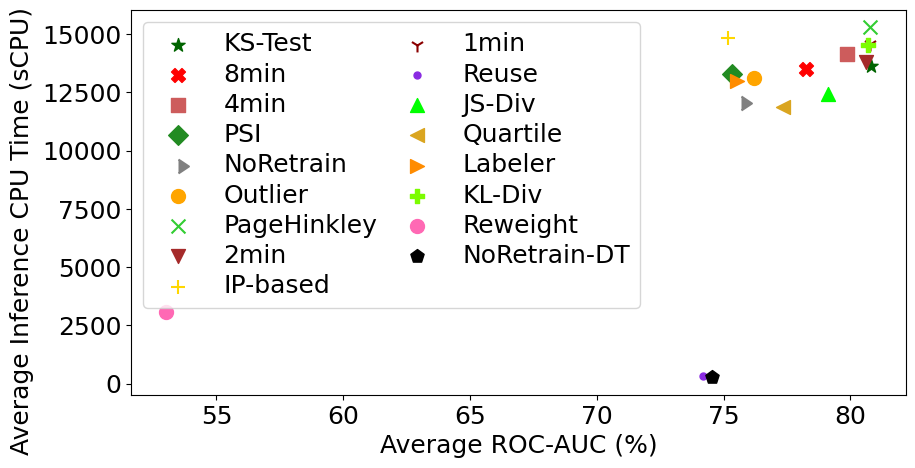

In [21]:
# df_plot3 = pd.DataFrame(columns=['algo', 'id', 'retrain', 'average', 'inference_cpu_time', 'inference_time_single', 'color'])

# for i, row in values_df.iterrows():
#     df_plot3.loc[len(df_plot3)] = [row['algo'], algorithms_name[row['algo']], row['retrain'], (sum(row['f1'])/len(row['f1']))*100, row['inference_cpu_time'], row['inference_time_single'], algorithms_color[row['algo']]]

# df_plot3['size'] = [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
# df_plot3['marker'] = ['*', 'X', ',', 'D', 9, 'o', 'x', 'v', '+', '1', '.', '^', '<', '>', 'P', 'o']

# df_plot3.reset_index(inplace=True, drop=True)

fig, ax = plt.subplots(figsize = (10, 5))

for i, row in df_plot3.iterrows():
    plt.scatter(x=row['average'], y=row['inference_cpu_time'], s=row['size'], c=row['color'], label=row['id'], marker=row['marker'])
ax.set(xlabel ="Average ROC-AUC (%)", ylabel = "Average Inference CPU Time (sCPU)")
ax.yaxis.set_label_coords(-0.125, 0.425)

plt.legend(loc='best', ncol=2, labelspacing=0.25, columnspacing=0.6)

plt.show()

# 3. Improvement

In [22]:
df_plot4 = df_plot2.copy(deep=True)
df_plot4['id'] = df_plot4['algo'].apply(lambda x: algorithms_name[x])
print(df_plot4['algo'].tolist())
print(df_plot4['id'].tolist())

['nurd', 'dt_clf_noretrain', 'nn_clf_quartile', 'nn_clf_psi', 'nn_clf_noretrain', 'nn_clf_outlier', 'model_zoo_sample', 'nn_clf_labeler', 'nn_clf_ip_based', 'nn_period_8', 'nn_period_4', 'nn_clf_js', 'nn_period_2', 'nn_period_1', 'nn_clf_ph', 'nn_clf_kl', 'nn_clf_ks']
['Reweight', 'NoRetrain-DT', 'Quartile', 'PSI', 'NoRetrain', 'Outlier', 'Reuse', 'Labeler', 'IP-based', '8min', '4min', 'JS-Div', '2min', '1min', 'PageHinkley', 'KL-Div', 'KS-Test']


In [23]:
df_plot4['id'].tolist()

['Reweight',
 'NoRetrain-DT',
 'Quartile',
 'PSI',
 'NoRetrain',
 'Outlier',
 'Reuse',
 'Labeler',
 'IP-based',
 '8min',
 '4min',
 'JS-Div',
 '2min',
 '1min',
 'PageHinkley',
 'KL-Div',
 'KS-Test']

In [25]:
f1s = df_plot4['roc_auc'].tolist()

In [26]:
for f1 in f1s:
    print(len(f1))

475
475
475
480
475
475
446
475
475
475
475
475
475
475
475
475
475


In [27]:
plot_df4 = pd.DataFrame(columns=df_plot4['algo'].tolist())

for i in range(35, 475):
    print(i)
    plot_df4.loc[len(plot_df4)] = [f1s[0][i], f1s[1][i], f1s[2][i], f1s[3][i+5], f1s[4][i], f1s[5][i], f1s[6][i-30], f1s[7][i], f1s[8][i], f1s[9][i], f1s[10][i], f1s[11][i], f1s[12][i], f1s[13][i], f1s[14][i], f1s[15][i], f1s[16][i]]

plot_df4

35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
3

,nurd,dt_clf_noretrain,nn_clf_quartile,nn_clf_psi,nn_clf_noretrain,nn_clf_outlier,model_zoo_sample,nn_clf_labeler,nn_clf_ip_based,nn_period_8,nn_period_4,nn_clf_js,nn_period_2,nn_period_1,nn_clf_ph,nn_clf_kl,nn_clf_ks
0,0.520446,0.794738,0.823877,0.786405,0.812921,0.816073,0.744468,0.812941,0.840314,0.851402,0.836224,0.835599,0.833545,0.836964,0.838698,0.835345,0.837152
1,0.516990,0.799324,0.826224,0.790933,0.816409,0.820225,0.783829,0.817215,0.841817,0.853998,0.838841,0.837737,0.837486,0.848783,0.845357,0.843243,0.844948
2,0.521992,0.784900,0.810012,0.795853,0.798671,0.803062,0.742616,0.800616,0.832452,0.844441,0.822653,0.813277,0.811570,0.819815,0.817744,0.814926,0.818387
3,0.528523,0.772762,0.795659,0.798839,0.782657,0.789984,0.781158,0.787971,0.828135,0.842160,0.809352,0.837780,0.805206,0.837657,0.841262,0.838983,0.841172
4,0.529750,0.770480,0.791310,0.791701,0.777783,0.785116,0.779378,0.783677,0.829772,0.833400,0.835442,0.835548,0.834796,0.835930,0.837015,0.835047,0.836815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,0.573125,0.716586,0.706115,0.724655,0.682537,0.687562,0.759951,0.801070,0.651682,0.657693,0.818974,0.811438,0.660176,0.801783,0.817763,0.811255,0.813887
436,0.555083,0.723249,0.739927,0.728202,0.727287,0.730670,0.770732,0.733472,0.709543,0.821999,0.826537,0.822702,0.824469,0.823119,0.822449,0.824228,0.823528
437,0.518661,0.722762,0.756331,0.723979,0.747222,0.749891,0.728121,0.715572,0.730132,0.812484,0.812648,0.812722,0.812968,0.793814,0.798243,0.793273,0.790603
438,0.519090,0.718594,0.750417,0.726157,0.740743,0.743415,0.712695,0.710737,0.722863,0.807707,0.807740,0.807768,0.813786,0.811443,0.813507,0.813043,0.812024


In [28]:
plot_df = plot_df4.groupby(np.arange(len(plot_df4))//10).mean()
plot_df

,nurd,dt_clf_noretrain,nn_clf_quartile,nn_clf_psi,nn_clf_noretrain,nn_clf_outlier,model_zoo_sample,nn_clf_labeler,nn_clf_ip_based,nn_period_8,nn_period_4,nn_clf_js,nn_period_2,nn_period_1,nn_clf_ph,nn_clf_kl,nn_clf_ks
0,0.527277,0.782691,0.806018,0.781956,0.794665,0.800197,0.760385,0.797757,0.834930,0.841676,0.826197,0.828362,0.820729,0.831549,0.831108,0.828707,0.831424
1,0.536910,0.755655,0.781031,0.725130,0.766857,0.773623,0.758486,0.772322,0.827182,0.815692,0.801807,0.816886,0.820066,0.823210,0.823290,0.822446,0.824790
2,0.533285,0.736256,0.729852,0.749557,0.700012,0.706022,0.760761,0.693017,0.770002,0.776690,0.789710,0.790626,0.786774,0.794840,0.788890,0.789157,0.790048
3,0.540810,0.740329,0.755851,0.660396,0.735634,0.741047,0.752589,0.732056,0.790162,0.774812,0.778294,0.766553,0.793320,0.806285,0.806652,0.805659,0.806040
4,0.541901,0.696747,0.737417,0.733043,0.728664,0.732328,0.685400,0.729061,0.760312,0.718604,0.786984,0.739529,0.808869,0.789084,0.787380,0.786690,0.787792
5,0.537700,0.718820,0.700083,0.733934,0.671019,0.677508,0.751906,0.662611,0.702355,0.754874,0.770937,0.780203,0.782758,0.785728,0.783927,0.785227,0.785785
6,0.517070,0.755572,0.822377,0.737424,0.814262,0.817376,0.716213,0.813579,0.804685,0.794546,0.811817,0.826208,0.816639,0.825200,0.825687,0.825477,0.825064
7,0.533221,0.736563,0.747104,0.784826,0.728050,0.733988,0.751103,0.726595,0.721941,0.767656,0.797675,0.814676,0.804599,0.807601,0.806519,0.805998,0.807357
8,0.534750,0.765109,0.790315,0.793261,0.777422,0.784255,0.761258,0.782614,0.757833,0.815070,0.818218,0.814196,0.818712,0.822537,0.819724,0.821798,0.821385
9,0.517274,0.760841,0.822826,0.808209,0.815713,0.819216,0.737360,0.815268,0.812589,0.806971,0.816319,0.816083,0.817991,0.819904,0.819963,0.819440,0.819681


In [29]:
print(plot_df.columns.tolist())

['nurd', 'dt_clf_noretrain', 'nn_clf_quartile', 'nn_clf_psi', 'nn_clf_noretrain', 'nn_clf_outlier', 'model_zoo_sample', 'nn_clf_labeler', 'nn_clf_ip_based', 'nn_period_8', 'nn_period_4', 'nn_clf_js', 'nn_period_2', 'nn_period_1', 'nn_clf_ph', 'nn_clf_kl', 'nn_clf_ks']


In [39]:
# '*', 'X', ',', 'D', 9, 'o', 'x', 'v', '+', '1', '.', '^', '<', '>', 'P', 'o'
algorithms_marker = {
    "nn_clf_ks": "*",
    "nn_period_8": "X",
    "nn_period_4": ",",
    "nn_clf_psi": "D",
    "nn_clf_noretrain": 9,
    "nn_clf_outlier": "o",
    "nn_clf_ph": "x",
    "nn_period_2": "v",
    "nn_clf_ip_based": "+",
    "nn_period_1": "1",
    "model_zoo_sample": ".",
    "nn_clf_js": "^",
    "nn_clf_quartile": "<",
    "nn_clf_labeler": ">",
    "nn_clf_kl": "P",
    "nurd": "o",
    "dt_clf_noretrain": "p"
}

algorithms_color = {
    "nn_clf_noretrain": "grey",
    "nn_period_8": "red",
    "nn_period_4": "blue",
    "nn_period_2": "green",
    "nn_period_1": "gold",
    "nn_clf_ip_based": "red",
    "nn_clf_outlier": "blue",
    "nn_clf_quartile": "green",
    "nn_clf_labeler": "gold",
    "nn_clf_psi": "cyan",
    "nn_clf_ks": "red",
    "nn_clf_ph": "blue",
    "nn_clf_js": "green",
    "nn_clf_kl": "gold",
    "model_zoo_sample": "blueviolet",
    "nurd": "hotpink",
    "dt_clf_noretrain": "black"
}

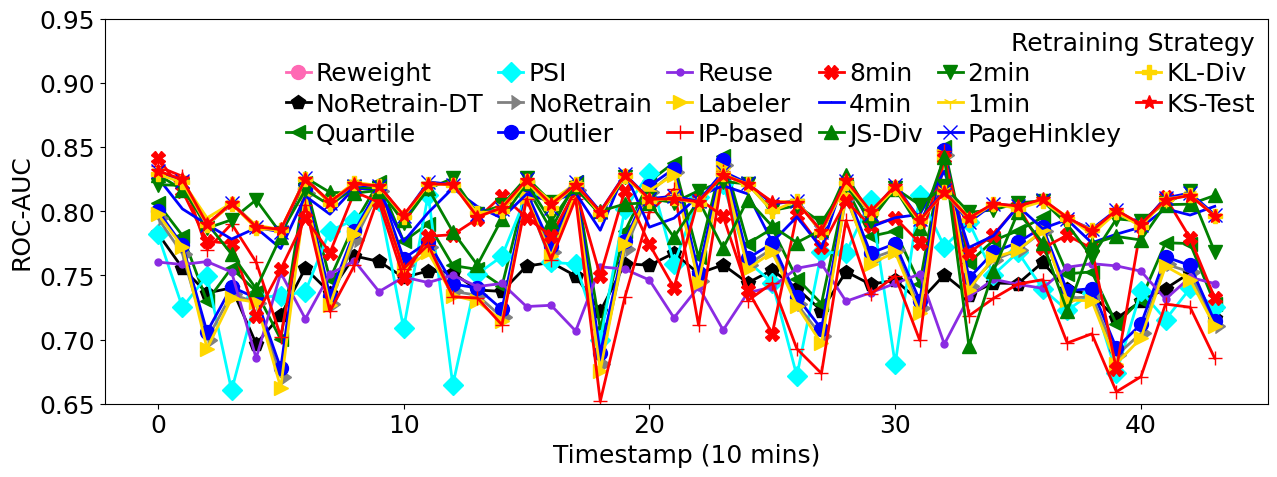

In [40]:
fig, ax = plt.subplots(figsize=(15, 5))
# plot_df.plot()
for col in plot_df.columns:
    plt.plot(plot_df.index, plot_df[col], label=algorithms_name[col], color=algorithms_color[col], linewidth=2, marker=algorithms_marker[col], markersize=10)
plt.legend(ncol=6, loc="best",
           title="Retraining Strategy", alignment='right', 
           frameon=False, facecolor=(1, 1, 1, 0), 
           edgecolor='black', labelspacing=0.25, columnspacing=0.6, borderpad=0, 
           handletextpad=0.2, handlelength=1)
plt.ylim(0.65, 0.95)
plt.xlabel('Timestamp (10 mins)')
plt.ylabel('ROC-AUC')
plt.show()

In [174]:
plt.rcParams.update({'font.size': 16})

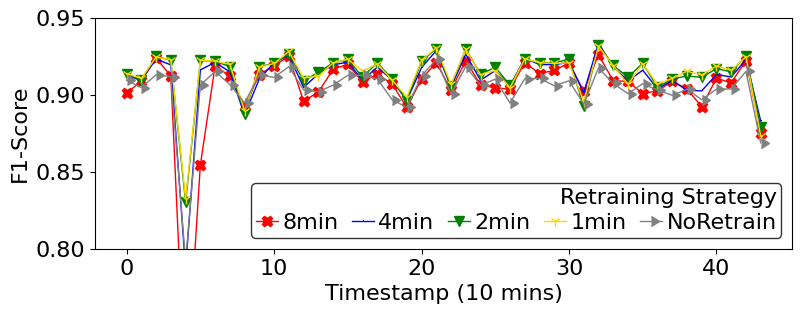

In [185]:
fig, ax = plt.subplots(figsize=(9, 3))
# plot_df.plot()
for col in ['nn_period_8', 'nn_period_4', 'nn_period_2', 'nn_period_1', 'nn_clf_noretrain']:
    plt.plot(plot_df.index, plot_df[col], label=algorithms_name[col], color=algorithms_color[col], linewidth=1, marker=algorithms_marker[col], markersize=7.5)
plt.legend(ncol=5, loc="lower right",
           title="Retraining Strategy", alignment='right', 
           frameon=True, facecolor=(1, 1, 1, 0), 
           edgecolor='black', labelspacing=0.25, columnspacing=0.6, borderpad=0.2, 
           handletextpad=0.2, handlelength=1)
plt.ylim(0.8, 0.95)
plt.xlabel('Timestamp (10 mins)')
plt.ylabel('F1-Score')
plt.show()

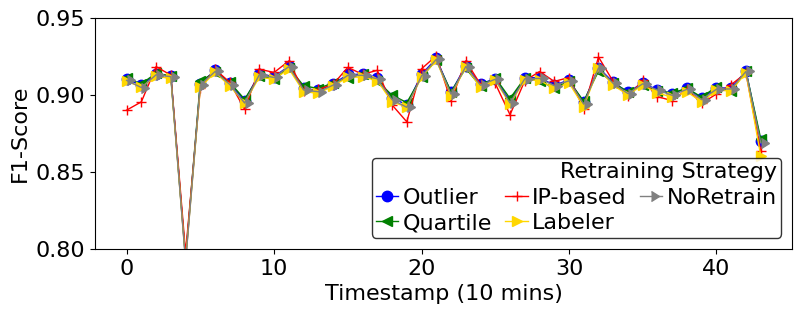

In [183]:
fig, ax = plt.subplots(figsize=(9, 3))
# plot_df.plot()
for col in ['nn_clf_outlier', 'nn_clf_quartile', 'nn_clf_ip_based', 'nn_clf_labeler', 'nn_clf_noretrain']:
    plt.plot(plot_df.index, plot_df[col], label=algorithms_name[col], color=algorithms_color[col], linewidth=1, marker=algorithms_marker[col], markersize=7.5)
plt.legend(ncol=3, loc="lower right",
           title="Retraining Strategy", alignment='right', 
           frameon=True, facecolor=(1, 1, 1, 0), 
           edgecolor='black', labelspacing=0.25, columnspacing=0.6, borderpad=0.2, 
           handletextpad=0.2, handlelength=1)
plt.ylim(0.8, 0.95)
plt.xlabel('Timestamp (10 mins)')
plt.ylabel('F1-Score')
plt.show()

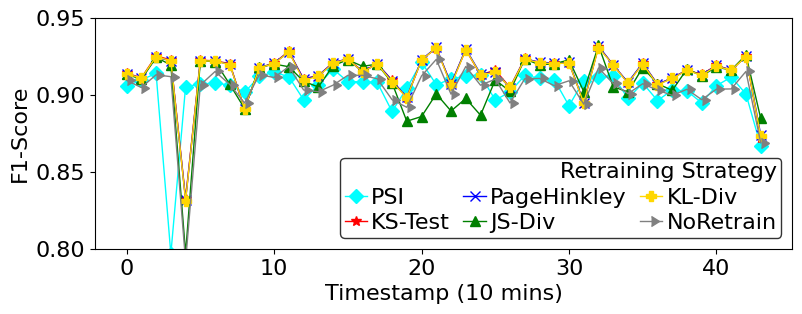

In [184]:
fig, ax = plt.subplots(figsize=(9, 3))
# plot_df.plot()
for col in ['nn_clf_psi', 'nn_clf_ks', 'nn_clf_ph', 'nn_clf_js', 'nn_clf_kl', 'nn_clf_noretrain']:
    plt.plot(plot_df.index, plot_df[col], label=algorithms_name[col], color=algorithms_color[col], linewidth=1, marker=algorithms_marker[col], markersize=7.5)
plt.legend(ncol=3, loc="lower right",
           title="Retraining Strategy", alignment='right', 
           frameon=True, facecolor=(1, 1, 1, 0), 
           edgecolor='black', labelspacing=0.25, columnspacing=0.6, borderpad=0.2, 
           handletextpad=0.2, handlelength=1)
plt.ylim(0.8, 0.95)
plt.xlabel('Timestamp (10 mins)')
plt.ylabel('F1-Score')
plt.show()

In [ ]:
/mnt/extra/continuous-training/results/1716763301509528146/dt_clf_noretrain.csv

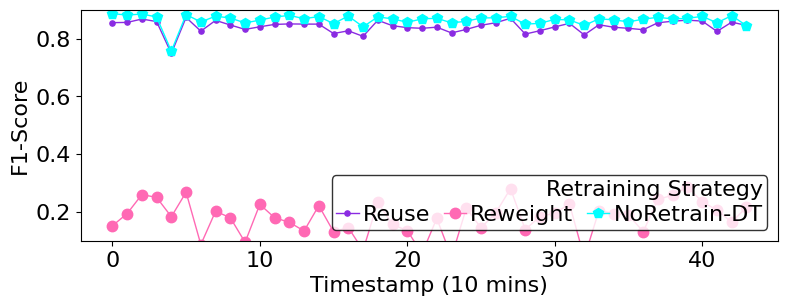

In [209]:
fig, ax = plt.subplots(figsize=(9, 3))
# plot_df.plot()
for col in ['model_zoo_sample', 'nurd', 'dt_clf_noretrain']:
    plt.plot(plot_df.index, plot_df[col], label=algorithms_name[col], color=algorithms_color[col], linewidth=1, marker=algorithms_marker[col], markersize=7.5)
plt.legend(ncol=3, loc="lower right",
           title="Retraining Strategy", alignment='right', 
           frameon=True, facecolor=(1, 1, 1, 0), 
           edgecolor='black', labelspacing=0.25, columnspacing=0.6, borderpad=0.2, 
           handletextpad=0.2, handlelength=1)
plt.ylim(0.1, 0.9)
plt.xlabel('Timestamp (10 mins)')
plt.ylabel('F1-Score')
plt.show()

# 4. Overhead

In [41]:
values_df

,path,algo,length,f1,roc_auc,retrain,training_time_total,training_time_single,training_cpu_time,training_counter,inference_time_total,inference_time_single,inference_cpu_time,inference_counter
0,/mnt/extra/continuous-training/results/1716388...,nn_clf_ks,480,"[0.9214611710327476, 0.919838888618434, 0.9048...","[0.8198498888028423, 0.8256601797271587, 0.849...",479.0,21980.649150,45.793019,51703.47,480.0,10032.250347,2.540995e-05,13639.67,394815847.0
1,/mnt/extra/continuous-training/results/1716427...,nn_period_8,480,"[0.9202471017528276, 0.9175025731603492, 0.907...","[0.8134299335664734, 0.8109008831448392, 0.817...",60.0,2889.722465,47.372499,6878.79,61.0,10184.816628,2.579637e-05,13500.27,394815847.0
2,/mnt/extra/continuous-training/results/1716441...,nn_period_4,480,"[0.9209700758525065, 0.9183215734915602, 0.908...","[0.8125884933601596, 0.8102673592798255, 0.817...",120.0,5734.934710,47.396155,13857.33,121.0,10331.345422,2.616750e-05,14153.37,394815847.0
3,/mnt/extra/continuous-training/results/1716367...,nn_clf_psi,480,"[0.9197654622644006, 0.9172083649553148, 0.907...","[0.810808516523525, 0.8087955474825699, 0.8151...",0.0,116.802383,116.802383,273.06,1.0,10143.362862,2.569138e-05,13277.23,394815847.0
4,/mnt/extra/continuous-training/results/1716379...,nn_clf_noretrain,480,"[0.9201613827625776, 0.9176643724824766, 0.907...","[0.8111232931972419, 0.8093186911374659, 0.815...",0.0,132.626504,132.626504,308.03,1.0,8628.072599,2.185341e-05,12061.30,394815847.0
5,/mnt/extra/continuous-training/results/1716212...,nn_clf_outlier,480,"[0.9205160678335544, 0.9178789920684164, 0.908...","[0.8136540751780935, 0.8111766805273294, 0.817...",0.0,130.000752,130.000752,319.28,1.0,9089.687840,2.302260e-05,13129.92,394815847.0
6,/mnt/extra/continuous-training/results/1716243...,nn_clf_ph,480,"[0.9201277632974332, 0.9190521660981638, 0.902...","[0.8124159658424613, 0.8198419941018107, 0.848...",479.0,22076.109312,45.991894,53973.83,480.0,11240.523951,2.847030e-05,15293.58,394815847.0
7,/mnt/extra/continuous-training/results/1716460...,nn_period_2,480,"[0.9207771776908976, 0.9180044629557522, 0.908...","[0.814364051086718, 0.8116612453498218, 0.8183...",239.0,11168.904291,46.537101,27860.93,240.0,9452.793773,2.394229e-05,13791.21,394815847.0
8,/mnt/extra/continuous-training/results/1716198...,nn_clf_ip_based,480,"[0.9199549694759536, 0.9174194431905214, 0.907...","[0.8103088217334729, 0.8081884380025653, 0.814...",9.0,595.274385,59.527438,1346.02,10.0,11122.100411,2.817035e-05,14819.12,394815847.0
9,/mnt/extra/continuous-training/results/1716484...,nn_period_1,480,"[0.9207450601580952, 0.9192487228493398, 0.904...","[0.8170635314445682, 0.8243580018287757, 0.847...",479.0,21924.009195,45.675019,57641.16,480.0,9823.677795,2.488167e-05,14566.30,394815847.0


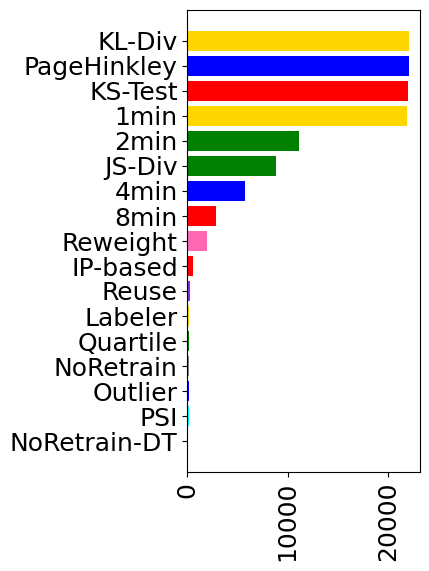

In [54]:
plot_df = values_df.copy(deep=True)
plot_df.sort_values(by=['training_time_total'], ascending=True, inplace=True)

fig, ax = plt.subplots(figsize=(3, 6))
for i, row in plot_df.iterrows():
    plt.barh(algorithms_name[row['algo']], row['training_time_total'], color=algorithms_color[row['algo']], label=algorithms_name[row['algo']])
plt.xticks(rotation=90)
# plt.legend()
plt.show()